Image shape: (1600, 1156)


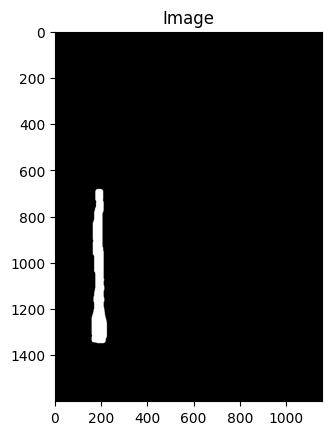

In [23]:
import tifffile as tiff
import matplotlib.pyplot as plt

# Load the OME-TIFF file
image_path = 'data/2_pulp.ome.tiff'
img = tiff.imread(image_path)

# Display information about the image
print(f"Image shape: {img.shape}")  # e.g., (height, width, channels)

# If the image has multiple channels, you can inspect and visualize each channel
if len(img.shape) == 3:  # For multi-channel images
    for i in range(img.shape[2]):
        plt.imshow(img[:, :, i], cmap='gray')
        plt.title(f'Channel {i}')
        plt.show()
else:  # If it's a single-channel image
    plt.imshow(img, cmap='gray')
    plt.title('Image')
    plt.show()

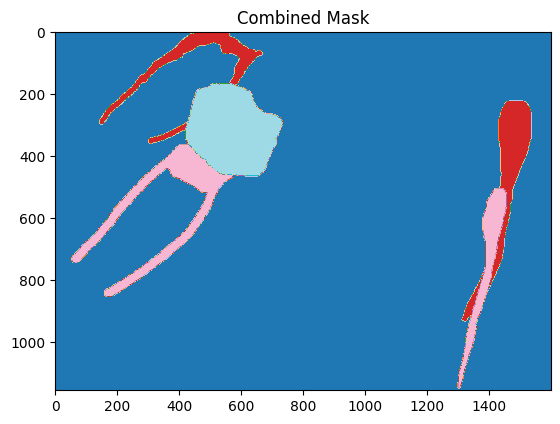

In [25]:
import tifffile as tiff
import numpy as np
import matplotlib.pyplot as plt

background_mask_path ='data/Ajay_Sharma_46_Implant_4_3-10_implant.ome.tiff'
cavity_mask_path = 'data/Ajay_Sharma_46_Implant_4_3-10_pulp.ome.tiff'
restoration_2_mask_path = 'data/Ajay_Sharma_46_Implant_4_3-10_restoration.ome.tiff'
pulp_mask_path = 'data/Ajay_Sharma_Implant_46_Diag_X-ray_pulp.ome.tiff'
restoration_mask_path = 'data/Ajay_Sharma_Implant_46_Diag_X-ray_restoration.ome.tiff'

# Load each mask
background_mask = tiff.imread(background_mask_path)
restoration_2_mask = tiff.imread(background_mask_path)
cavity_mask = tiff.imread(cavity_mask_path)
pulp_mask = tiff.imread(pulp_mask_path)
restoration_mask = tiff.imread(restoration_mask_path)

# Ensure all masks are of the same shape
assert background_mask.shape == cavity_mask.shape == pulp_mask.shape == restoration_mask.shape

# Initialize a combined mask with zeros (background)
combined_mask = np.zeros_like(background_mask, dtype=np.uint8)

# Assign unique values for each mask
combined_mask[background_mask > 0] = 0  # Background, usually 0, so this is redundant
combined_mask[cavity_mask > 0] = 1      # Cavity
combined_mask[pulp_mask > 0] = 2        # Pulp
combined_mask[restoration_mask > 0] = 3 # Restoration

# Display the combined mask
plt.imshow(combined_mask, cmap='tab20')  # 'tab20' will show different regions in different colors
plt.title('Combined Mask')
plt.show()

# Save the combined mask as a TIFF or PNG file if needed
tiff.imwrite('combined_mask.tiff', combined_mask)

In [7]:
unique_patients = ['Ajay_Sharma', 'DigX', '2', '4', '9']

In [6]:
import os

In [7]:
files = {}
found = False

for fp in os.listdir('data'):
   if 'Ajay_Sharma' in fp:
      files['Ajay_Sharma'] = files.get('Ajay_Sharma', [])
      files['Ajay_Sharma'].append(fp)
   elif 'DigX' in fp:
      files['DigX'] = files.get('DigX', [])
      files['DigX'].append(fp)
   elif '2' in fp:
      files['2'] = files.get('2', [])
      files['2'].append(fp)
   elif '4' in fp:
      files['4'] = files.get('4', [])
      files['4'].append(fp)
   elif '9' in fp:
      files['9'] = files.get('9', [])
      files['9'].append(fp)

In [8]:
files

{'DigX': ['DigX_01012017_113154_root-canal-obturation.ome.tiff',
  'DigX_01032016_174930_root-stumps.ome.tiff',
  'DigX_01022016_131410_restoration.ome.tiff',
  'DigX_01032016_174930_decay-caries.ome.tiff',
  'DigX_01022016_113212_root-canal-obturation.ome.tiff',
  'DigX_01012016_102315_pulp.ome.tiff',
  'DigX_01012009_120804_pulp.ome.tiff',
  'DigX_01032006_175914_restoration.ome.tiff',
  'DigX_01022008_110918_pulp.ome.tiff',
  'DigX_01012009_131431_pulp.ome.tiff',
  'DigX_01022008_110918_decay-caries.ome.tiff',
  'DigX_01022006_104640_restoration.ome.tiff',
  'DigX_01012016_102315_root-canal-obturation.ome.tiff',
  'DigX_01012017_113154_restoration.ome.tiff',
  'DigX_01032009_192751_root-canal-obturation.ome.tiff',
  'DigX_01012016_190837_decay-caries.ome.tiff',
  'DigX_01032016_174930_restoration.ome.tiff',
  'DigX_01012017_113154_pulp.ome.tiff',
  'DigX_01012016_190837_pulp.ome.tiff',
  'DigX_01022006_125030_pulp.ome.tiff',
  'DigX_01032009_192751_bridge.ome.tiff',
  'DigX_01022006

In [35]:
paths = files['4']

In [36]:
paths

['4_root-stumps.ome.tiff',
 '4_root-canal-obturation.ome.tiff',
 '4_restoration.ome.tiff']

In [37]:
masks = [tiff.imread(f'data/{path}') for path in paths]

In [38]:
mask_shapes = [mask.shape for mask in masks]

In [39]:
mask_shapes

[(1600, 1156), (1600, 1156), (1600, 1156)]

In [19]:
combined_mask = np.zeros_like(masks[0], dtype=np.uint8)

NameError: name 'np' is not defined

In [20]:
for i in range(len(masks)):
    try:
        combined_mask[masks[i] > 0] = i
    except:
        pass

In [21]:
plt.imshow(combined_mask, cmap='tab20') 
plt.title('Combined Mask')
plt.show()

NameError: name 'combined_mask' is not defined

In [100]:
for x in os.listdir('data'):
    img = tiff.imread(f'data/{x}')
    if len(img.shape) != 2:
        print(img.shape)

In [26]:
masks = [tiff.imread(f'data/{path}') for path in paths]

In [27]:
mask_shapes

[(1154, 1598),
 (1598, 1154),
 (1154, 1598),
 (1598, 1154),
 (1598, 1154),
 (1154, 1598),
 (1156, 1600),
 (1156, 1600),
 (1156, 1600),
 (1156, 1600),
 (1156, 1600),
 (1156, 1600),
 (1154, 1598),
 (1154, 1598),
 (1156, 1600),
 (1598, 1154),
 (1598, 1154),
 (1154, 1598),
 (1598, 1154),
 (1600, 1156),
 (1156, 1600),
 (1156, 1600),
 (1156, 1600),
 (1156, 1600),
 (1154, 1598),
 (1156, 1600),
 (1600, 1156),
 (1600, 1156),
 (1156, 1600),
 (1156, 1600),
 (1156, 1600),
 (1598, 1154),
 (1156, 1600),
 (1156, 1600),
 (1600, 1156),
 (1156, 1600),
 (1600, 1156),
 (1154, 1598),
 (1156, 1600),
 (1156, 1600)]